<a href="https://colab.research.google.com/github/erokemwa/Data-Science/blob/main/UEFAM8_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cross-Validation Accuracy: 0.45 (±0.35)

Test Set Performance:
Accuracy: 0.75
AUC-ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



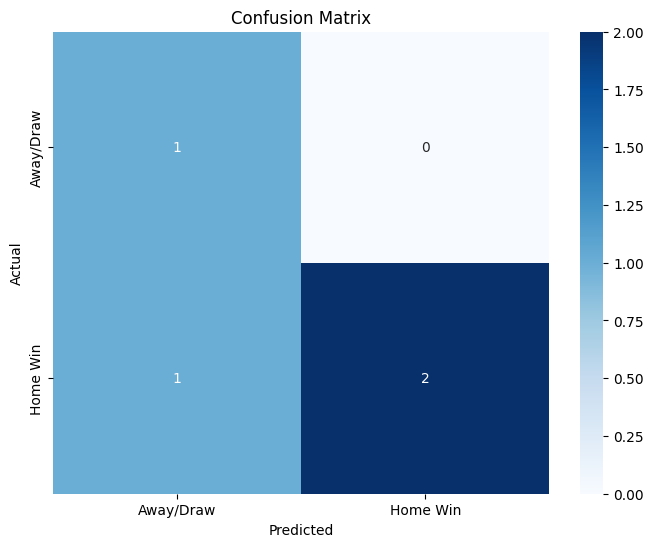

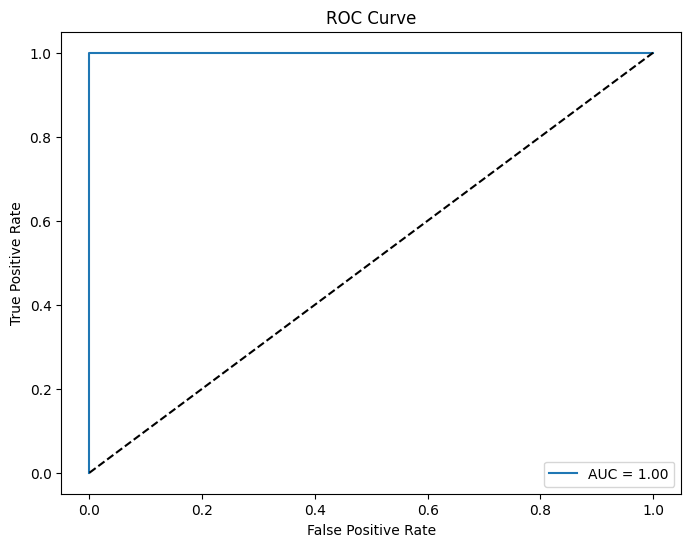

<ipython-input-1-f565a41be0c9>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


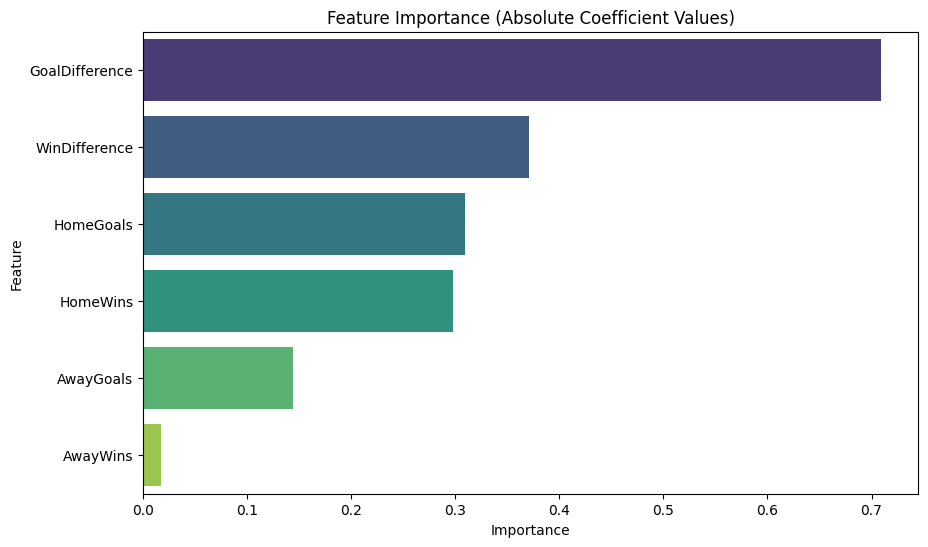


Match Predictions:
Aston Villa vs Celtic
Prediction: Home Win (Confidence: 55.24%)
------------------------------
B. Dortmund vs Barcelona
Prediction: Home Win (Confidence: 58.96%)
------------------------------
Bayern Munich vs Atletico Madrid
Prediction: Home Win (Confidence: 97.78%)
------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler

# Enhanced sample data with more features
data = {
    'HomeTeam': ['Aston Villa', 'B. Dortmund', 'Bayern Munich', 'Brest', 'Celta Vigo',
                 'Feyenoord', 'Inter', 'Juventus', 'Leverkusen', 'Lille', 'Man City',
                 'PSV', 'Salzburg', 'Sporting CP', 'Sturm Graz', 'Young Boys'],
    'AwayTeam': ['Celtic', 'Barcelona', 'Atletico Madrid', 'Real Madrid', 'Arsenal',
                 'Shakhtar', 'Milan', 'Benfica', 'Sparta Praha', 'Club Brugge',
                 'Liverpool', 'Atleti', 'Bologna', 'Leipzig', 'Paris', 'Crvena Zvezda'],
    'HomeWins': [15, 20, 25, 12, 10, 18, 22, 24, 17, 14, 26, 19, 13, 16, 11, 9],
    'AwayWins': [10, 15, 10, 8, 12, 14, 18, 16, 11, 10, 12, 15, 9, 13, 8, 7],
    'HomeGoals': [32, 45, 50, 28, 25, 40, 48, 42, 35, 30, 55, 38, 28, 34, 24, 20],
    'AwayGoals': [20, 35, 25, 18, 22, 30, 35, 28, 22, 20, 30, 32, 18, 25, 15, 12],
    'Result': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Feature engineering
df['WinDifference'] = df['HomeWins'] - df['AwayWins']
df['GoalDifference'] = df['HomeGoals'] - df['AwayGoals']

# Features and target
features = ['HomeWins', 'AwayWins', 'HomeGoals', 'AwayGoals', 'WinDifference', 'GoalDifference']
X = df[features]
y = df['Result']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Initialize model with balanced class weights
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Cross-validation with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f} (±{np.std(cv_scores):.2f})")

# Train final model
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Away/Draw', 'Home Win'],
            yticklabels=['Away/Draw', 'Home Win'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

# Prediction demonstration with new data
new_matches = pd.DataFrame({
    'HomeTeam': ['Aston Villa', 'B. Dortmund', 'Bayern Munich'],
    'AwayTeam': ['Celtic', 'Barcelona', 'Atletico Madrid'],
    'HomeWins': [15, 20, 25],
    'AwayWins': [10, 15, 10],
    'HomeGoals': [32, 45, 50],
    'AwayGoals': [20, 35, 25]
})

# Preprocess new data
new_matches['WinDifference'] = new_matches['HomeWins'] - new_matches['AwayWins']
new_matches['GoalDifference'] = new_matches['HomeGoals'] - new_matches['AwayGoals']
X_new = scaler.transform(new_matches[features])

# Make predictions
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]

# Display results
print("\nMatch Predictions:")
for i, (home, away, pred, prob) in enumerate(zip(new_matches['HomeTeam'],
                                               new_matches['AwayTeam'],
                                               predictions, probabilities)):
    outcome = 'Home Win' if pred == 1 else 'Away/Draw'
    print(f"{home} vs {away}")
    print(f"Prediction: {outcome} (Confidence: {prob:.2%})")
    print("-" * 30)